# Exercice : quadrature de Gauss


## Description

On considère la fonction 
\begin{eqnarray}
g(x)=1+\cos\left( \frac{15}{2} (x+1)\right)+\frac{9}{4} (x+1),
\end{eqnarray}
pour $x\in [-1,1]$. 
L'intégrale exacte est :
$$
\int_{-1}^{1} g(x) dx = 6.586705045354282249.
$$

On considère la règle de quadrature de Gauss :
$$
\int_{-1}^{1} h(x) f(x) dx \approx \sum_{i}^n w_i h(x_i)
$$
où $\{x_i\}_{i=1,...,n}$ sont les noeuds et $\{w_i\}_{i=1,...,n}$ sont les poids, $h$ est l'intégrande et $f$ est la densité de probabilité associée à la règle de quadrature. 

Puisque la densité de probabilité $f$ n'apparaît pas nécessairement dans l'intégrande $g$, nous considérons l'intégrande :
$$
h(x) = \frac{g(x)}{f(x)}
$$
pour tout $x\in[-1,1]$. 
Ainsi, 
$$
\int_{-1}^{1} h(x) f(x) dx = \int_{-1}^{1} \frac{g(x)}{f(x)} f(x) dx = \int_{-1}^{1} g(x) dx
$$
qui est l'intégrale recherchée. 
La règle de quadrature est alors :
$$
\int_{-1}^{1} g(x) dx \approx \sum_{i}^n w_i h(x_i) = \sum_{i}^n w_i \frac{g(x_i)}{f(x_i)}.
$$

L'objectif de cet exercice est de créer la règle de quadrature de Gauss-Legendre et de l'appliquer à cet exemple. 

Dans le but de vérifier le nombre de chiffres significatifs dans le résultat, on utilisera la fonction `computeDigits` suivante, qui évalue le nombre de chiffres corrects dans la variable `approximate` par rapport à la valeur exacte de l'intégrale. 

In [1]:
def computeDigits(approximate):
    ''''Returns the number of decimal digits in the approximate integral.'''
    data = np.finfo(float)
    exact = 6.586705045354282249
    re = abs(approximate-exact)/abs(exact)
    if (re==0.):
        d = data.precision
    else:
        d = -np.log10(re)
    return d

## Questions

Partie 1 : définition de la fonction
* Utiliser la classe `SymbolicFunction` pour définir la fonction `g` associée à l'intégrande.
* Fixer la variable `npoints = 50` contenant le nombre de points associés à la règle de quadrature.
* Utiliser la méthode `draw` de `g` pour dessiner la fonction sur l'intervalle [-1,1] avec `npoints` points.

Partie 2 : avec les polynômes de Legendre
* Créer la variable `lefa` contenant une instance de la classe `LegendreFactory`. 
* Utiliser la méthode `getMeasure` pour créer la variable `measure` contenant la densité de probabilité associée à cette famille de polynômes orthogonaux. Afficher cette mesure.
* Utiliser la méthode `getNodesAndWeights` pour générer la liste des noeuds `nodes` et des poids `weights` de la règle de quadrature avec `npoints` points.
* Créer un graphique représentant les noeuds en abscisses et les poids en ordonnées. Qu'observez-vous ? Quelle est la répartition des noeuds de quadrature ? Quel est le lien avec la précision d'estimation de l'erreur ?
* Utiliser une boucle `for` pour estimer l'intégrale par la règle de quadrature. 
* Utiliser la fonction `computeDigits` pour estimer le nombre de chiffres significatifs dans le résultat. Quelle précision obtenez-vous ?

Partie 3 : avec les polynômes de Chebyshev
* Réitérer le processus ave la classe `ChebychevFactory`.

Partie 4 : avec les polynômes de Jacobi
* Réitérer le processus ave la classe `JacobiFactory`.

Synthèse : comparer les résultats. Quelle méthode donne les meilleurs résultats ? Pourquoi ?

## Description

In [2]:
import openturns as ot
import numpy as np

## Définition de la fonction

In [3]:
g = ot.SymbolicFunction("x","1+cos(15*(x+1)/2)+9*(x+1)/4 ")

In [4]:
npoints = 50

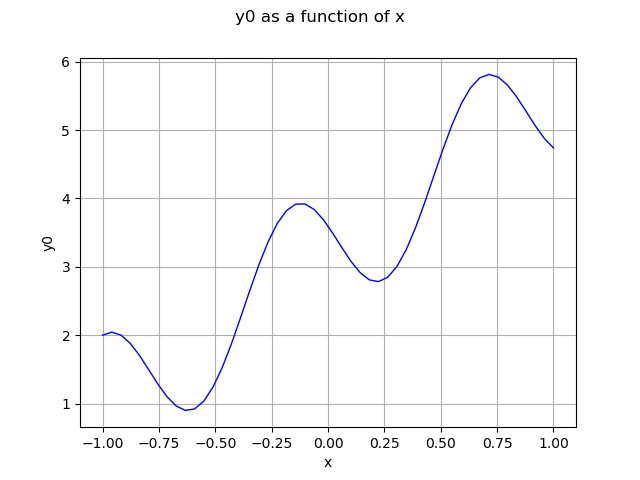

In [5]:
g.draw(-1,1,npoints)

## Avec les polynômes de Legendre

In [6]:
lefa = ot.LegendreFactory()

In [7]:
measure = lefa.getMeasure()
measure

class=Uniform name=Uniform dimension=1 a=-1 b=1

In [8]:
nodes, weights = lefa.getNodesAndWeights(npoints)

In [9]:
len(nodes)

50

In [10]:
nodes

class=Point name=Unnamed dimension=50 values=[-0.998866,-0.994032,-0.985354,-0.972864,-0.956611,-0.936657,-0.913079,-0.885968,-0.85543,-0.821582,-0.784556,-0.744494,-0.701552,-0.655896,-0.607703,-0.557158,-0.504458,-0.449806,-0.393414,-0.3355,-0.276288,-0.216007,-0.154891,-0.0931747,-0.0310983,0.0310983,0.0931747,0.154891,0.216007,0.276288,0.3355,0.393414,0.449806,0.504458,0.557158,0.607703,0.655896,0.701552,0.744494,0.784556,0.821582,0.85543,0.885968,0.913079,0.936657,0.956611,0.972864,0.985354,0.994032,0.998866]

In [11]:
weights

class=Point name=Unnamed dimension=50 values=[0.00145431,0.0033799,0.00529527,0.00719041,0.00905778,0.0108901,0.0126803,0.0144215,0.0161069,0.0177299,0.0192844,0.0207642,0.0221638,0.0234775,0.0247005,0.0258279,0.0268553,0.0277789,0.028595,0.0293004,0.0298925,0.030369,0.0307279,0.030968,0.0310883,0.0310883,0.030968,0.0307279,0.030369,0.0298925,0.0293004,0.028595,0.0277789,0.0268553,0.0258279,0.0247005,0.0234775,0.0221638,0.0207642,0.0192844,0.0177299,0.0161069,0.0144215,0.0126803,0.0108901,0.00905778,0.00719041,0.00529527,0.0033799,0.00145431]

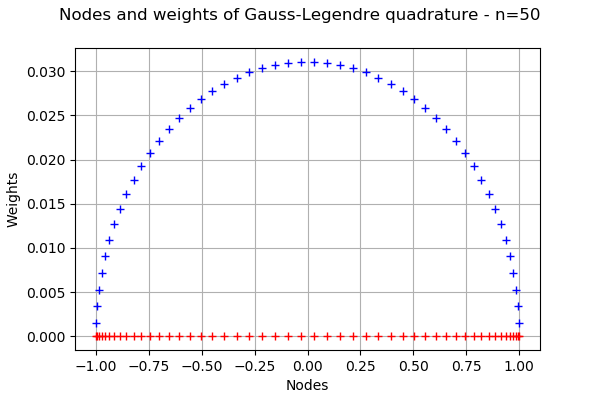

In [12]:
def plotNodesAndWeights(nodes,weights,title):
    graph = ot.Graph(title,"Nodes","Weights",True)
    cloud = ot.Cloud(nodes,weights)
    graph.add(cloud)
    zeros = ot.Sample(len(nodes),1)
    cloudZeros = ot.Cloud(ot.Sample(nodes,1),zeros)
    cloudZeros.setColor("red")
    graph.add(cloudZeros)
    return graph

title = "Nodes and weights of Gauss-Legendre quadrature - n=%d" % (npoints)
plotNodesAndWeights(nodes,weights,title)

On observe que la densité de points est plus importante sur les bords du domaine. Cela favorise une limitation de l'amplitude du polynôme nodal $\omega_n$. 

Comme la densité de probabilité uniforme est constante sur l'intervalle [-1,1], on peut calculer la valeur une fois pour toute, avant la boucle `for`.

In [13]:
f = measure.computePDF(0.)
f

0.5

In [14]:
I = 0.
for i in range(npoints):
    I+= weights[i] * g([nodes[i]])[0]/f
I

6.586705045354282

In [15]:
computeDigits(I)

15

On observe que la précision est maximale avec la règle de Gauss-Legendre.

## Avec les polynômes de Chebyshev

In [16]:
chefa = ot.ChebychevFactory()

In [17]:
measure = chefa.getMeasure()
measure

class=Arcsine name=Arcsine dimension=1 a=-1 b=1

In [18]:
nodes, weights = chefa.getNodesAndWeights(npoints)

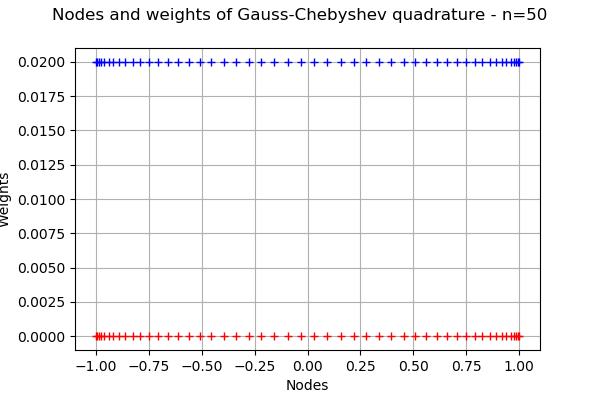

In [19]:
title = "Nodes and weights of Gauss-Chebyshev quadrature - n=%d" % (npoints)
plotNodesAndWeights(nodes,weights,title)

In [20]:
I = 0.
for i in range(npoints):
    f = measure.computePDF(nodes[i])
    I+= weights[i] * g([nodes[i]])[0]/ f
I

6.587813632262346

In [21]:
computeDigits(I)

3.773898470583524

## Avec les polynômes de Jacobi

In [22]:
jafa = ot.JacobiFactory()

In [23]:
measure = jafa.getMeasure()
measure

class=Beta name=Beta dimension=1 r=2 t=4 a=-1 b=1

In [24]:
nodes, weights = jafa.getNodesAndWeights(npoints)

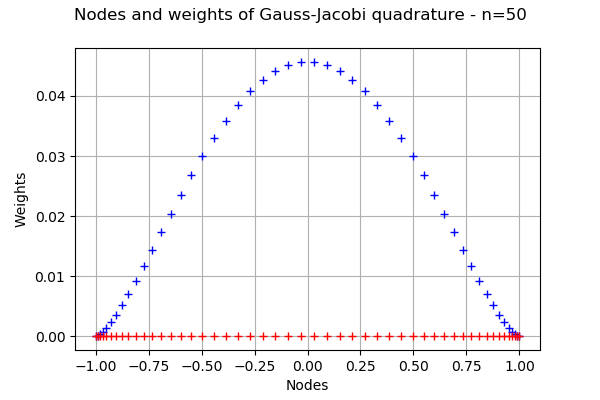

In [25]:
title = "Nodes and weights of Gauss-Jacobi quadrature - n=%d" % (npoints)
plotNodesAndWeights(nodes,weights,title)

In [26]:
I = 0.
for i in range(npoints):
    f = measure.computePDF(nodes[i])
    I+= weights[i] * g([nodes[i]])[0]/ f
I

6.581621853735013

In [27]:
computeDigits(I)

3.112531734582403

## Conclusion

On observe que les règles de quadrature de Gauss ont des performances différentes en fonction de la base polynomiale utilisée pour la générer.

| Règle | Integrale | Chiffres décimaux corrects |
|---|---|---|
| Exact | 6.586705045354282 | - |
| Gauss-Legendre | 6.586705045354282 | 15 |
| Gauss-Chebyshev | 6.587813632262346 | 3.7 |
| Gauss-Jacobi | 6.581621853735013 | 3.1 |

De toute évidence, c'est la règle de Gauss-Legendre qui est la plus précise dans ce cas particulier. Bien sûr, l'intégrande considérée se prête mieux à une intégration avec une distribution uniforme. En effet, la division par la densité de probabilité artificiellement introduites pour rentrer dans le cadre de la quadrature de Gauss ne favorisent pas la convergence.